In [55]:
consumer_key = 'twKlZH3suYkRJRYBnJFGLCCnL'
consumer_secret = 'RBgW7DfW0FxcRl3VXm76tBJ02LmPVdQL8A5RoeMQrAF5lW61bq'
access_token = '107991822-bjjdRQGUGSRLMtQVnOnSPY8yqLOVrf81uWCMvHKy'
access_token_secret = 'V2lRDvXjveAh26FLhghMOt6aY0xWS9fARfDOCVOCs6sPg'

In [56]:
from tweepy import API
from tweepy.auth import OAuthHandler
from tweepy import Cursor
import csv
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = API(auth)

# Open/Create a file to append data
csvFile = open('twitter-analysis-with-header.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile, lineterminator='\n')

for tweet in Cursor(api.search, q="java||scala", lang='en', count='10000000').items() :
        try:
           csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), tweet.lang])
        except Exception as e:
            print(e)
            continue

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import csv

tweets_data = pd.read_csv('twitter-analysis.csv')

tweets_data.columns = ['date','text','lang']

tweets_data.to_csv('twitter-analysis-with-header.csv')
print(tweets_data)


                    date                                               text  \
0    2016-02-29 14:13:52  b'RT @kipsigman: Published @playframework #sca...   
1    2016-02-29 14:02:10  b'RT @ScalaFact: Commitment to #Scala has not ...   
2    2016-02-29 13:47:27  b'RT @mabrewer7: Commitment to #Scala has not ...   
3    2016-02-29 13:46:06  b'RT @capumen: Java/Scala/C++/C# Mid to Junior...   
4    2016-02-29 13:43:21  b'RT @ScalaFact: Commitment to #Scala has not ...   
5    2016-02-29 13:39:58  b'RT @ScalaFact: Commitment to #Scala has not ...   
6    2016-02-29 13:34:33  b'RT @ScalaFact: Commitment to #Scala has not ...   
7    2016-02-29 13:33:15  b'RT @ScalaFact: Commitment to #Scala has not ...   
8    2016-02-29 13:29:51  b'RT @mabrewer7: Commitment to #Scala has not ...   
9    2016-02-29 13:22:25  b'Hacker News - Lightbend and Scala: Questions...   
10   2016-02-29 13:09:29  b'RT @capumen: Java/Scala/C++/C# Mid to Junior...   
11   2016-02-29 13:00:44  b'Java/Scala/C++/C# Mid to

In [28]:
import re 
#(@[A-Za-z0-9]+)|(#[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)
#at-mentions = r''(@[A-Za-z0-9]+)'
#hashTags = r'(#[A-Za-z0-9_]+)'
#urlLinks = r'http\S+'
#otherChars = r'([^0-9A-Za-z \t])'
#words = r'(\w+:\/\/\S+)'

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False


325
382


In [59]:
import pandas as pd

tweets = pd.read_csv('twitter-analysis-with-header.csv')
tweets['java'] = tweets['text'].apply(lambda tweet: word_in_text('java', tweet))
tweets['scala'] = tweets['text'].apply(lambda tweet: word_in_text('scala', tweet))
print (tweets['java'].value_counts()[True])
print (tweets['scala'].value_counts()[True])

2668
2674


java  tweets  2668
scala  tweets  2674


<function matplotlib.pyplot.show>

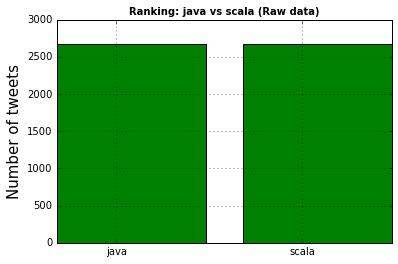

In [90]:
%matplotlib inline  
prg_langs = ['java', 'scala']
print ("java  tweets ", (tweets['java'].value_counts()[True]))
print ("scala  tweets ", (tweets['scala'].value_counts()[True]))
tweets_by_prg_lang = [tweets['java'].value_counts()[True], tweets['scala'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: java vs scala (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
plt.show

In [61]:
#Taking Relevant Tweets

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or 
                                          word_in_text('tutorial', tweet) or 
                                          word_in_text('developer', tweet) or
                                          word_in_text('software', tweet) or
                                          word_in_text('development', tweet)
                                         )
print(tweets['relevant'].value_counts()[True])


743


java relevant tweets  737
scala relevant tweets  726


<function matplotlib.pyplot.show>

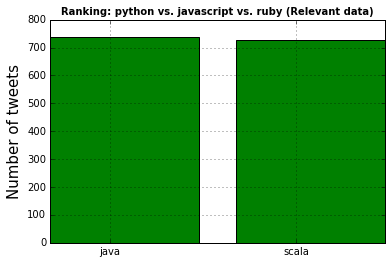

In [89]:
print ("java relevant tweets ", (tweets[tweets['relevant'] == True]['java'].value_counts()[True]))
print ("scala relevant tweets ", (tweets[tweets['relevant'] == True]['scala'].value_counts()[True]))
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['java'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['scala'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
plt.show

In [65]:
import urllib
import urllib.request
import json

results = []
for index, row in tweets.iterrows():
    print(row['text'])
    data = urllib.parse.urlencode({"text": re.sub(r"http\S+", "", row['text'])}) 
    binary_data = data.encode('utf-8')
    u = urllib.request.urlopen("http://text-processing.com/api/sentiment/", binary_data)
    result = json.loads(u.read().decode('utf-8'))
    results.append(result['label'])
    print(result['label'])


b'RT @kipsigman: Published @playframework #scala extensions: HTML5 image edit/upld, java.time, S3 integration - https://t.co/WAbkiK7JIA'
neutral
b'RT @ScalaFact: Commitment to #Scala has not diminished! - https://t.co/zs0vu7GQix @lightbend'
neutral
b'RT @mabrewer7: Commitment to #Scala has not diminished! - https://t.co/1gVG30Dvav @lightbend'
neutral
b'RT @capumen: Java/Scala/C++/C# Mid to Junior Developers, London\n https://t.co/595hHOgyu4 \n#capumen\n#java\n#scala'
neutral
b'RT @ScalaFact: Commitment to #Scala has not diminished! - https://t.co/zs0vu7GQix @lightbend'
neutral
b'RT @ScalaFact: Commitment to #Scala has not diminished! - https://t.co/zs0vu7GQix @lightbend'
neutral
b'RT @ScalaFact: Commitment to #Scala has not diminished! - https://t.co/zs0vu7GQix @lightbend'
neutral
b'RT @ScalaFact: Commitment to #Scala has not diminished! - https://t.co/zs0vu7GQix @lightbend'
neutral
b'RT @mabrewer7: Commitment to #Scala has not diminished! - https://t.co/1gVG30Dvav @lightbend'
neutral


NameError: name 'dataf' is not defined

In [66]:
tweets['label-ext'] = results
tweets.to_csv('twitter-analysis-with-header.csv')

java  345
scala  339


<function matplotlib.pyplot.show>

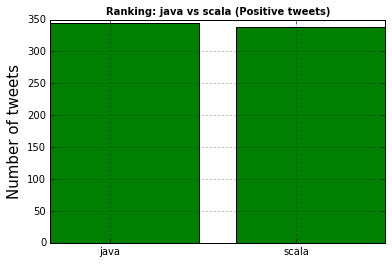

In [91]:
print("java ",(tweets[tweets['label-ext'] == 'pos']['java'].value_counts()[True]))
print("scala ", (tweets[tweets['label-ext'] == 'pos']['scala'].value_counts()[True]))
tweets_by_prg_lang = [tweets[tweets['label-ext'] == 'pos']['java'].value_counts()[True], 
                      tweets[tweets['label-ext'] == 'pos']['scala'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: java vs scala (Positive tweets)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
plt.show

java negative tweets 267
scala negative tweets 271


<function matplotlib.pyplot.show>

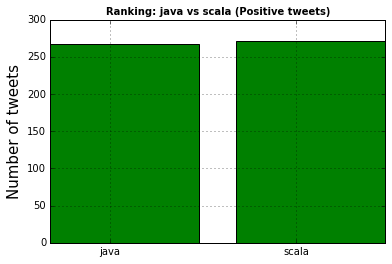

In [93]:
print("java negative tweets",(tweets[tweets['label-ext'] == 'neg']['java'].value_counts()[True]))
print("scala negative tweets", (tweets[tweets['label-ext'] == 'neg']['scala'].value_counts()[True]))
tweets_by_prg_lang = [tweets[tweets['label-ext'] == 'neg']['java'].value_counts()[True], 
                      tweets[tweets['label-ext'] == 'neg']['scala'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: java vs scala (Positive tweets)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
plt.show

java nuetral tweets 2056
scala nuetral tweets 2064


<function matplotlib.pyplot.show>

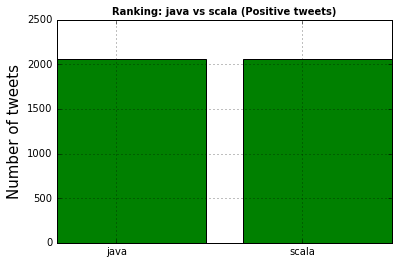

In [95]:
print("java nuetral tweets",(tweets[tweets['label-ext'] == 'neutral']['java'].value_counts()[True]))
print("scala nuetral tweets", (tweets[tweets['label-ext'] == 'neutral']['scala'].value_counts()[True]))
tweets_by_prg_lang = [tweets[tweets['label-ext'] == 'neutral']['java'].value_counts()[True], 
                      tweets[tweets['label-ext'] == 'neutral']['scala'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: java vs scala (Positive tweets)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
plt.show